# Scores Regression

The present script describes the application of the multiple linear regression technique using the [statsmodel](https://www.statsmodels.org/) library, as well as the interpretation of its results. The residuals obtained from the created model do not adhere to normality, as indicated by the Shapiro-Francia test. Therefore, the use of the Box-Cox transformation is necessary to normalize the data and apply regression again. Specifically, in this database, the R² of the model applied to the original dependent variable is higher than that of the model after the Box-Cox transformation. Even when checking the scatter plots of the real and fitted values, it is difficult to consider the Box-Cox model as superior. Nevertheless, the model is better fitted after the transformation, once the residuals adhere to normality.

## Dataset Description

The database provides information on the hours of study and the scores gotten by a group of students, with 'Score' as the dependent variable and 'Hours' as the predictor variable. The purpose is to create a model to predict the students' score based on their hours of study. 

## Implementation

- Check the dataset.


- Descriptive Statistics.


- Adjust the model equation using the least squares method.


- Checking the Residual Normality.


- Box-Cox Transformation.


- Adjust the model again (with the transformed y).



***

## Checking the Dataset

In [69]:
# Libraries needed
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sfrancia import shapiroFrancia
from scipy.stats import boxcox

sns.set()
warnings.filterwarnings("ignore")

In [70]:
# Checking the data
df_scores = pd.read_csv('Data/Hours_scores.csv')
df_scores.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [71]:
# Dataset shape
df_scores.shape

(25, 2)

The small number of observations will impact on the statistical significance of the intercept.

In [72]:
# Checking NaN values
df_scores.isna().sum()

Hours     0
Scores    0
dtype: int64

## Descriptive statistics

In [73]:
# Descriptive statistics
df_scores.describe().T.round(2).drop('count',1)

,mean,std,min,25%,50%,75%,max
Hours,5.01,2.53,1.1,2.7,4.8,7.4,9.2
Scores,51.48,25.29,17.0,30.0,47.0,75.0,95.0


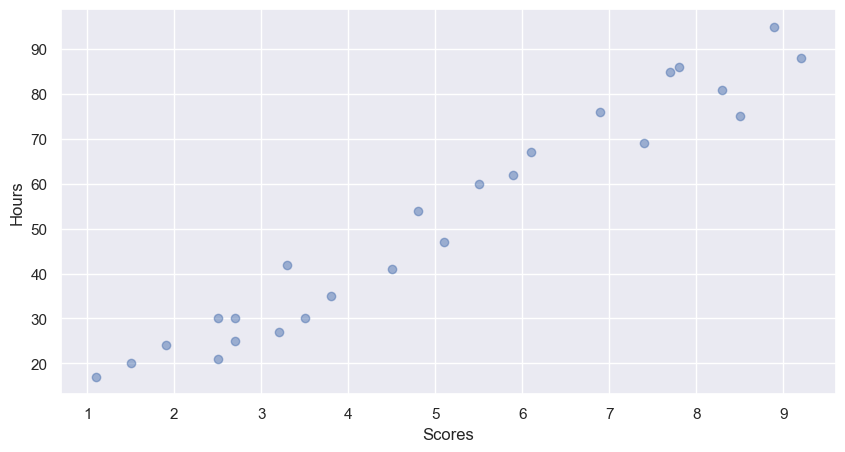

In [74]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df_scores['Hours'], df_scores['Scores'], alpha=.5)
plt.xlabel('Scores')
plt.ylabel('Hours');

## Adjusting the Model

A multiple linear regression model will be created, which considers 'Hours' as the predictor variables and 'Score' as the dependent variable.

In [75]:
# Splitting predictor and dependent variables
X = df_scores['Hours'].values
y = df_scores['Scores'].values

In [76]:
# Adding the constant (intercept)
X = sm.add_constant(X)

In [77]:
# Fitting the linear regression model (OLS)
model = sm.OLS(y, X).fit()

In [78]:
# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           9.13e-17
Time:                        09:54:19   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

It is interesting to note that the intercept was not statistically significant. This is due to the small number of observations. The intercept **should not be disregarded**.

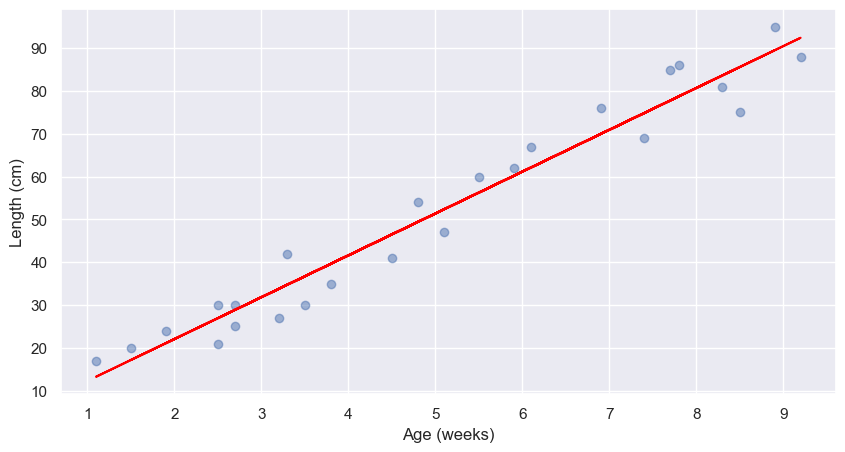

In [79]:
# Getting the predicted values
predicted_values = model.predict(sm.add_constant(X))

# Plotagem do gráfico de dispersão com a reta
fig = plt.figure(figsize=(10,5))
plt.scatter(df_scores['Hours'].values, y, alpha=.5)
plt.plot(df_scores['Hours'].values, predicted_values, color='red')
plt.xlabel('Age (weeks)')
plt.ylabel('Length (cm)');

The line seems to be well-fitted to the values. However, residual normality should still be checked.

## Checking the Residual Normality

An initial way to assess the residual normality of a model is to plot a histogram of the residuals.

In [80]:
# Getting the residuals
residuals = predicted_values - df_scores['Scores']

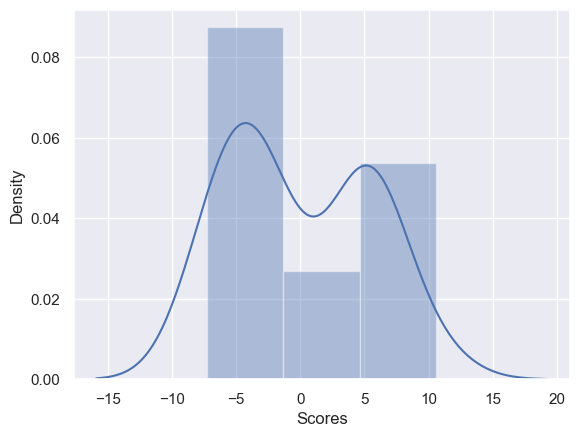

In [81]:
# Plotting the Residuals Histogram
sns.distplot(residuals);

Observing the behavior of the histogram, it is clear that the residuals are not adhering to normality. To confirm this, the Shapiro test will be used.

In [83]:
# Applying the shapiro Francia test
shapiroFrancia(residuals)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.918009521730952,
 'statistics z': 1.6819501273773685,
 'p-value': 0.0462892555977027}

The Shapiro test, having a p-value lower than 0.05, indicates that the residuals do not adhere to normality. Therefore, it will be necessary to apply the Box-Cox transformation.

## Box-Cox Transformation

The Box-Cox transformation is a technique used to transform a non-normal dependent variable into a normally distributed variable. The transformation is a mathematical function that can be applied to a variable with different parameters. The goal is to find the optimal value of the parameter that produces the transformation with the closest possible distribution to a normal distribution. The optimal parameter is found through a grid search or numerical optimization.

We will find, through the scipy library, the boxcox lambda and the already calculated dependent variable values, according to the formula:

$ybc_i = \Large \frac {y^{λ} - 1}{λ} $

In [85]:
# Getting the lambda and the dependent variable transformed
xt, lmbda = boxcox(df_scores['Scores'])

In [86]:
print(f'lambda: {lmbda}')
print(f'First y: {df_scores["Scores"][0]}')

lambda: 0.30823808994473056
First y: 21


Considering the first value of y (21), the Box-Cox transformation follows the formula:
    

$ybc_i = \Large \frac {21^{0.308} - 1}{0.308} $

In [87]:
((df_scores['Scores'][0]**lmbda)-1)/lmbda

5.047998088810142

The boxcox function is returning the values of the predictor variable correctly, therefore, these transformed values will be applied in a new model in place of the predictor variable.

## Adjusting the Model

A multiple linear regression model will be created, considering 'Scores' (with the boxcox transformation) as the dependent variable.

In [88]:
# Splitting predictor and dependent variables
X_bc = df_scores['Hours'].values
y_bc = xt

In [89]:
# Adding the constant, for considering the intercept
X_bc = sm.add_constant(X_bc)

In [90]:
# Fit the linear regression model using the OLS method
model_bc = sm.OLS(y_bc, X_bc).fit()

In [91]:
# Print the summary statistics of the model
print(model_bc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     391.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           6.04e-16
Time:                        09:54:34   Log-Likelihood:                -12.593
No. Observations:                  25   AIC:                             29.19
Df Residuals:                      23   BIC:                             31.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0448      0.189     21.443      0.0

As observed, the obtained R² was lower than that of the previous model.

In [92]:
# Getting the predicted values
predicted_values_bc = model_bc.predict(sm.add_constant(X))

In [93]:
# Getting the residuals
residuals_bc = predicted_values_bc - xt

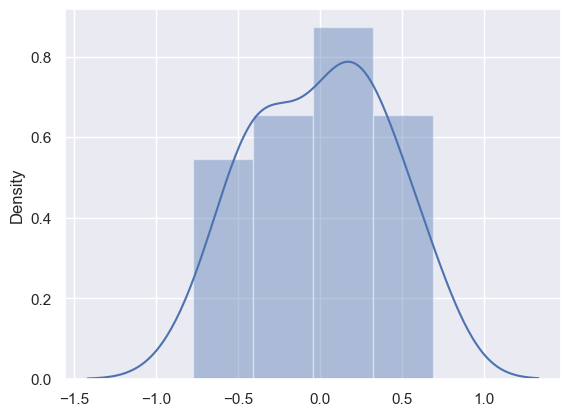

In [94]:
# Plotting the Residuals Histogram
sns.distplot(residuals_bc);

Now, observing the histogram of the residuals, it can be noticed that there is much greater adherence to normality.

In [95]:
# Applying the shapiro Francia test
shapiroFrancia(residuals_bc)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9795409756311075,
 'statistics z': -0.8340813891136603,
 'p-value': 0.7978824391073196}

Which is confirmed by the Shapiro-Francia test.

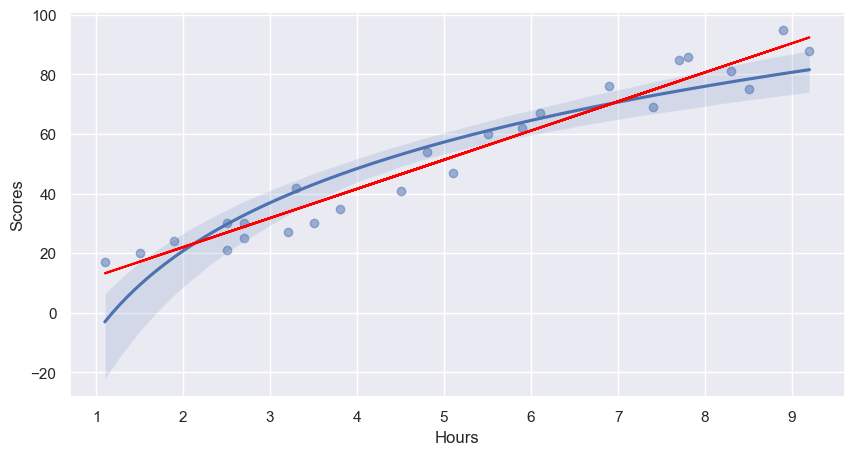

In [28]:
# Plotting the Scatters
fig = plt.figure(figsize=(10,5))
sns.regplot(x="Hours", y="Scores", data=df_scores,
             logx=True, scatter_kws={'alpha':0.5})
plt.plot(df_scores['Hours'], model.fittedvalues, color='red')
plt.xlabel('Hours')
plt.ylabel('Scores');

## Conclusions

Observing the scatter plot with the line corresponding to the previous linear regression and the curve corresponding to the regression with the Box-Cox transformation, it is really difficult to evaluate which one is better fitted. This fact, combined with the lower R², may lead us to believe that the Box-Cox transformation may have hindered rather than helped. However, the non-adherence to normality by the residuals indicates that the database indeed requires the transformation.

It is also important to keep in mind that the small number of observations can very easily bias the outputs.